## UCSV Univariate

Univariate UCSV(Unobserved Component Stochastic Volatility) 모형에 대한 자세한 설명은 `manual/UCSV Univariate.md` 참고.

In [2]:
# 기본 라이브러리 호출
import pandas as pd
import numpy as np

### 데이터 불러오기: 한국 소비자물가지수(CPI) -> 연율화된 분기별 인플레이션 변환

In [3]:
data = pd.read_csv("../data/cpi_1965.csv", index_col=0, encoding='euc-kr')
data.columns = ['cpi']
data.index = pd.date_range('1965', periods=len(data), freq='QE')  # Quarter End Frequency
# data.index = pd.date_range('1965', periods=len(data), freq='QE') # Recent Version

data = 400*np.log(data).diff().loc['1966':]
y = data['cpi']   # df.Series 테스트
y

1966-03-31    17.588526
1966-06-30    19.634098
1966-09-30    10.144478
1966-12-31    11.211945
1967-03-31     4.580452
                ...    
2021-03-31     5.116833
2021-06-30     2.122646
2021-09-30     2.734920
2021-12-31     3.951989
2022-03-31     6.121592
Freq: QE-DEC, Name: cpi, Length: 225, dtype: float64

`bok_da` 시계열분석 패키지 `ts`의 `ucsv` 모듈에서 `UnivarUCSV` 클래스를 불러온 후, `model` 객체 생성한다.

In [3]:
from bok_da.ts.ucsv import UnivarUCSV

# 테스트 설정입니다. 실제 사용시에는 충분한 수의 draws와 burnin을 설정해야 합니다.
model = UnivarUCSV(run_type='cython', verbose=True, n_draws=2500, n_burnin=500) # run_type='python' or 'cython
# model = bok_da.UnivarUCSV(run_type='cython', verbose=True, n_draws=2500, n_burnin=500) # withhout_install 코드에서는 cython을 사용할 수 없습니다

> Loading Cython Module...
> Attempting to dynamically import: bok_da.ts.ucsv.ucsv_functions_cython...
> Cython Module Loaded.
> Initializing Model...
  - Run Type: cython
  - n_per_year: 4
  - n_draws: 2500
  - thinning: 10
  - n_burnin: 500
  - Verbose: True


`model`의 메서드 `fit()`을 이용해서 UCSV 모형을 추정할 수 있다.

In [4]:
model.fit(y)

> Start Fitting Model...
  - Input Data: 225 samples


100%|██████████| 2500/2500 [00:10<00:00, 242.12it/s]

> Calculating Summary Statistics...
> Model Fitted.


`print_summary` 메서드를 통해 요약된 추정 결과를 확인할 수 있다.

In [5]:
model.print_summary()

------------------------------------------------------
 Variable    Mean    Var      2.5     97.5     ESS    
------------------------------------------------------
 g_eps      0.0087  0.0353  -0.2843  0.3040  165.7639 
 g_dtau    -0.0244  0.1456  -0.5058  0.5238  200.0000 
 ps         0.9699  0.0002   0.9413  0.9912  102.6996 
------------------------------------------------------


`print_traceplot` 메서드를 이용해 추정결과를 plot한다.

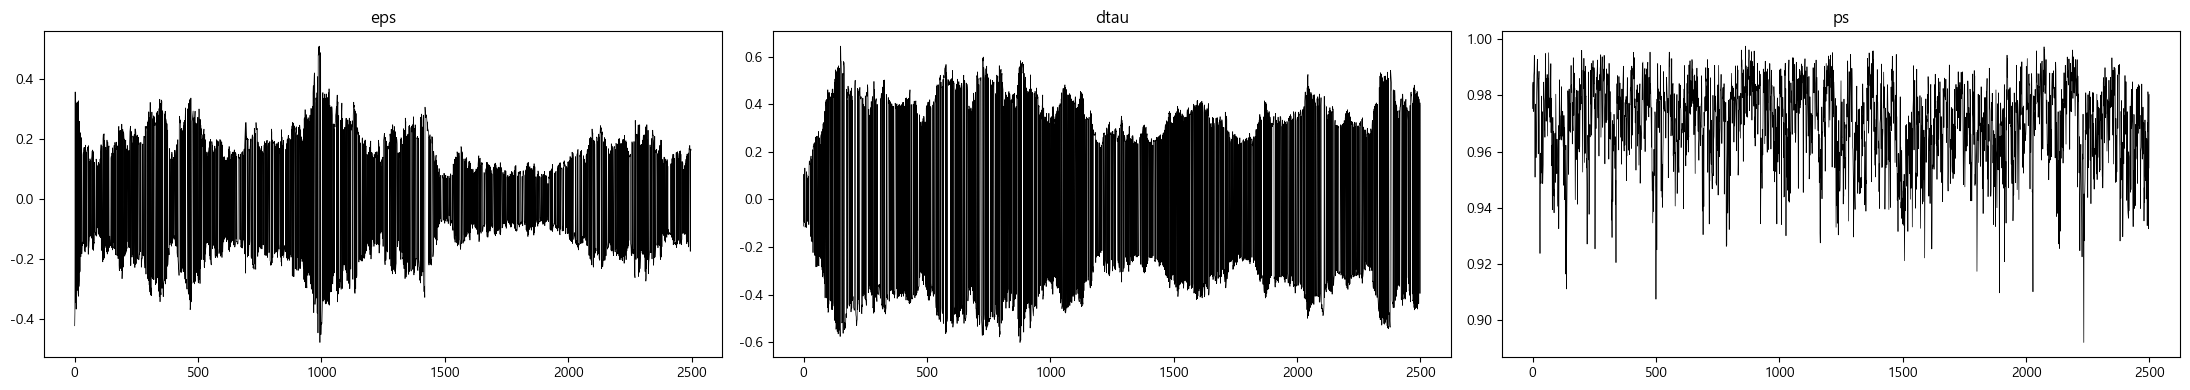

In [6]:
model.print_traceplot()